# Exploratory Analysis -- Metadata


#### Imports


In [78]:
import sys
!{sys.executable} -m pip install umap-learn

     |████████████████████████████████| 80 kB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 55.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 94.5 MB/s eta 0:00:01
     |████████████████████████████████| 25.3 MB 78.8 MB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76566 sha256=ca9ead313617f18dee2695f6a1987c8057b00d47d98e30094d14fd17e9de15bc
  Stored in directory: /home/hadoop/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.2-py3-none-any.whl size=51347 sha256=c7dbc4e226ba2c5be1e519f4afa70ec3027cdae0c3c374e44999e03a35d69023
  Stored in directory: /home/hadoop/.cache/pip/wheels/62/0b/55/40d651c5a4106ea9ce68d014335a1c7bf059530722c0107b15
Successfully built umap-learn pynndescent


In [186]:
import sys
!{sys.executable} -m pip install plotly

     |████████████████████████████████| 13.2 MB 28.3 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=32d212b37ab8de1dde3940bf255bd2208ea46a31938a52454a27b69a4180a980
  Stored in directory: /home/hadoop/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [1]:
import plotly
plotly.__version__


'4.14.3'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext

import time 
from time import sleep

sc = SparkContext()
sc

<SparkContext master=yarn appName=pyspark-shell>

In [4]:
spark = SparkSession \
 .builder \
 .appName("Python Spark SQL basic example") \
 .config("spark.some.config.option", "some-value") \
 .getOrCreate()

In [5]:
from pyspark.sql import functions as F
from pyspark.sql.types import StringType,ArrayType

### Read in metadata 

In [6]:
data = spark.read.csv('s3://ai2-semanticscholar-cord-19/2021-05-03/metadata.csv/',header = True)

In [7]:
data.cache()

DataFrame[cord_uid: string, sha: string, source_x: string, title: string, doi: string, pmcid: string, pubmed_id: string, license: string, abstract: string, publish_time: string, authors: string, journal: string, mag_id: string, who_covidence_id: string, arxiv_id: string, pdf_json_files: string, pmc_json_files: string, url: string, s2_id: string]

In [8]:
data.columns

['cord_uid',
 'sha',
 'source_x',
 'title',
 'doi',
 'pmcid',
 'pubmed_id',
 'license',
 'abstract',
 'publish_time',
 'authors',
 'journal',
 'mag_id',
 'who_covidence_id',
 'arxiv_id',
 'pdf_json_files',
 'pmc_json_files',
 'url',
 's2_id']

In [9]:
data[['cord_uid','title','abstract','authors','journal','pmc_json_files','url']].show()

+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|cord_uid|               title|            abstract|             authors|             journal|      pmc_json_files|                 url|
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|ug7v899j|Clinical features...|OBJECTIVE: This r...|Madani, Tariq A; ...|      BMC Infect Dis|document_parses/p...|https://www.ncbi....|
|02tnwd4m|Nitric oxide: a p...|Inflammatory dise...|Vliet, Albert van...|          Respir Res|document_parses/p...|https://www.ncbi....|
|ejv2xln0|Surfactant protei...|Surfactant protei...|     Crouch, Erika C|          Respir Res|document_parses/p...|https://www.ncbi....|
|2b73a28n|Role of endotheli...|Endothelin-1 (ET-...|Fagan, Karen A; M...|          Respir Res|document_parses/p...|https://www.ncbi....|
|9785vg6d|Gene expression i...|Respirator

## Load embeddings from S3 bucket

In [10]:
embedding = spark.read.csv('s3://hids511final/cord_19_embeddings_2021-05-03.csv',header = False)

In [11]:
embedding.cache()

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string, _c12: string, _c13: string, _c14: string, _c15: string, _c16: string, _c17: string, _c18: string, _c19: string, _c20: string, _c21: string, _c22: string, _c23: string, _c24: string, _c25: string, _c26: string, _c27: string, _c28: string, _c29: string, _c30: string, _c31: string, _c32: string, _c33: string, _c34: string, _c35: string, _c36: string, _c37: string, _c38: string, _c39: string, _c40: string, _c41: string, _c42: string, _c43: string, _c44: string, _c45: string, _c46: string, _c47: string, _c48: string, _c49: string, _c50: string, _c51: string, _c52: string, _c53: string, _c54: string, _c55: string, _c56: string, _c57: string, _c58: string, _c59: string, _c60: string, _c61: string, _c62: string, _c63: string, _c64: string, _c65: string, _c66: string, _c67: string, _c68: string, _c69: string, _c70: string, _c71: 

In [12]:
embedding.columns

['_c0',
 '_c1',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11',
 '_c12',
 '_c13',
 '_c14',
 '_c15',
 '_c16',
 '_c17',
 '_c18',
 '_c19',
 '_c20',
 '_c21',
 '_c22',
 '_c23',
 '_c24',
 '_c25',
 '_c26',
 '_c27',
 '_c28',
 '_c29',
 '_c30',
 '_c31',
 '_c32',
 '_c33',
 '_c34',
 '_c35',
 '_c36',
 '_c37',
 '_c38',
 '_c39',
 '_c40',
 '_c41',
 '_c42',
 '_c43',
 '_c44',
 '_c45',
 '_c46',
 '_c47',
 '_c48',
 '_c49',
 '_c50',
 '_c51',
 '_c52',
 '_c53',
 '_c54',
 '_c55',
 '_c56',
 '_c57',
 '_c58',
 '_c59',
 '_c60',
 '_c61',
 '_c62',
 '_c63',
 '_c64',
 '_c65',
 '_c66',
 '_c67',
 '_c68',
 '_c69',
 '_c70',
 '_c71',
 '_c72',
 '_c73',
 '_c74',
 '_c75',
 '_c76',
 '_c77',
 '_c78',
 '_c79',
 '_c80',
 '_c81',
 '_c82',
 '_c83',
 '_c84',
 '_c85',
 '_c86',
 '_c87',
 '_c88',
 '_c89',
 '_c90',
 '_c91',
 '_c92',
 '_c93',
 '_c94',
 '_c95',
 '_c96',
 '_c97',
 '_c98',
 '_c99',
 '_c100',
 '_c101',
 '_c102',
 '_c103',
 '_c104',
 '_c105',
 '_c106',
 '_c107',
 '_c108',
 '_c109',
 '_c110',


In [13]:
embedding.count()

552928

In [14]:
## Vectorize data 
from pyspark.ml.feature import OneHotEncoder, StringIndexer, IndexToString, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline, Model

In [15]:
embed_cols = [i for i in embedding.columns if i != "_c0"]

In [16]:
from pyspark.sql.functions import col

embedding_float = embedding.select(*(c if c =="_c0" else col(c).cast("float").alias(c) for c in embedding.columns))

In [17]:
embedding_float[['_c0','_c1']].show()

+--------+-----------+
|     _c0|        _c1|
+--------+-----------+
|ug7v899j| -2.9399836|
|02tnwd4m|  4.6884656|
|ejv2xln0|  0.5599198|
|2b73a28n|  2.3525403|
|9785vg6d| -1.2909216|
|zjufx4fo|  2.7210763|
|5yhe786e|  -3.562534|
|8zchiykl|-0.00439921|
|8qnrcgnk|   2.569323|
|jg13scgo|  -4.686873|
|5tkvsudh| -0.0718144|
|6lvn10f4|  -5.229452|
|tvxpckxo| -3.9141045|
|mcuixluu|  -2.864266|
|6iu1dtyl|  2.9879527|
|t35n7bk9| -3.9089847|
|eiqypt0m| -2.7213426|
|sgmk96vr| -5.2066107|
|di0fcy0j|  1.9947275|
|4k8f7ou1| -0.0629611|
+--------+-----------+
only showing top 20 rows



In [18]:
assembler = VectorAssembler(
    inputCols= embed_cols,
    outputCol="EMBEDDING")

output = assembler.transform(embedding_float)

In [19]:
output[['_c0','EMBEDDING']].show()

+--------+--------------------+
|     _c0|           EMBEDDING|
+--------+--------------------+
|ug7v899j|[-2.9399836063385...|
|02tnwd4m|[4.68846559524536...|
|ejv2xln0|[0.55991977453231...|
|2b73a28n|[2.35254025459289...|
|9785vg6d|[-1.2909215688705...|
|zjufx4fo|[2.72107625007629...|
|5yhe786e|[-3.5625340938568...|
|8zchiykl|[-0.0043992102146...|
|8qnrcgnk|[2.56932306289672...|
|jg13scgo|[-4.6868729591369...|
|5tkvsudh|[-0.0718144029378...|
|6lvn10f4|[-5.2294521331787...|
|tvxpckxo|[-3.9141044616699...|
|mcuixluu|[-2.8642659187316...|
|6iu1dtyl|[2.98795270919799...|
|t35n7bk9|[-3.9089846611022...|
|eiqypt0m|[-2.7213425636291...|
|sgmk96vr|[-5.2066106796264...|
|di0fcy0j|[1.99472749233245...|
|4k8f7ou1|[-0.0629611015319...|
+--------+--------------------+
only showing top 20 rows



In [20]:
output.take(1)[0]['EMBEDDING'].shape

(768,)

In [21]:
output.columns

['_c0',
 '_c1',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11',
 '_c12',
 '_c13',
 '_c14',
 '_c15',
 '_c16',
 '_c17',
 '_c18',
 '_c19',
 '_c20',
 '_c21',
 '_c22',
 '_c23',
 '_c24',
 '_c25',
 '_c26',
 '_c27',
 '_c28',
 '_c29',
 '_c30',
 '_c31',
 '_c32',
 '_c33',
 '_c34',
 '_c35',
 '_c36',
 '_c37',
 '_c38',
 '_c39',
 '_c40',
 '_c41',
 '_c42',
 '_c43',
 '_c44',
 '_c45',
 '_c46',
 '_c47',
 '_c48',
 '_c49',
 '_c50',
 '_c51',
 '_c52',
 '_c53',
 '_c54',
 '_c55',
 '_c56',
 '_c57',
 '_c58',
 '_c59',
 '_c60',
 '_c61',
 '_c62',
 '_c63',
 '_c64',
 '_c65',
 '_c66',
 '_c67',
 '_c68',
 '_c69',
 '_c70',
 '_c71',
 '_c72',
 '_c73',
 '_c74',
 '_c75',
 '_c76',
 '_c77',
 '_c78',
 '_c79',
 '_c80',
 '_c81',
 '_c82',
 '_c83',
 '_c84',
 '_c85',
 '_c86',
 '_c87',
 '_c88',
 '_c89',
 '_c90',
 '_c91',
 '_c92',
 '_c93',
 '_c94',
 '_c95',
 '_c96',
 '_c97',
 '_c98',
 '_c99',
 '_c100',
 '_c101',
 '_c102',
 '_c103',
 '_c104',
 '_c105',
 '_c106',
 '_c107',
 '_c108',
 '_c109',
 '_c110',


In [92]:
from pyspark.ml.feature import PCA

In [107]:

pca = PCA(k=200, inputCol="EMBEDDING", outputCol="pca_features")
model = pca.fit(output)

model.explainedVariance

DenseVector([0.1828, 0.0819, 0.0623, 0.0532, 0.0262, 0.0219, 0.0209, 0.0175, 0.0169, 0.0162, 0.015, 0.0132, 0.0128, 0.0118, 0.0103, 0.0094, 0.009, 0.0086, 0.0083, 0.008, 0.0075, 0.0069, 0.0065, 0.0065, 0.0058, 0.0056, 0.0055, 0.0053, 0.005, 0.0048, 0.0046, 0.0045, 0.0044, 0.0043, 0.004, 0.0039, 0.0039, 0.0037, 0.0036, 0.0036, 0.0034, 0.0034, 0.0033, 0.0032, 0.0032, 0.0031, 0.0031, 0.0029, 0.0028, 0.0027, 0.0027, 0.0026, 0.0026, 0.0026, 0.0025, 0.0025, 0.0024, 0.0024, 0.0023, 0.0023, 0.0022, 0.0022, 0.0021, 0.0021, 0.0021, 0.0021, 0.002, 0.002, 0.0019, 0.0019, 0.0019, 0.0018, 0.0018, 0.0018, 0.0018, 0.0017, 0.0017, 0.0017, 0.0017, 0.0016, 0.0016, 0.0016, 0.0016, 0.0015, 0.0015, 0.0015, 0.0015, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0

In [108]:
pca_variance = [i for i in model.explainedVariance]

In [109]:
import pandas as pd

In [113]:
features = list(range(200))
pca_explained_variance = pd.DataFrame([features,pca_variance]).T.rename(columns={0:'pca_component',1:'expained_variance'}).set_index('pca_component')

In [114]:
pca_explained_variance['expained_variance'].sum()

0.9083026868546051

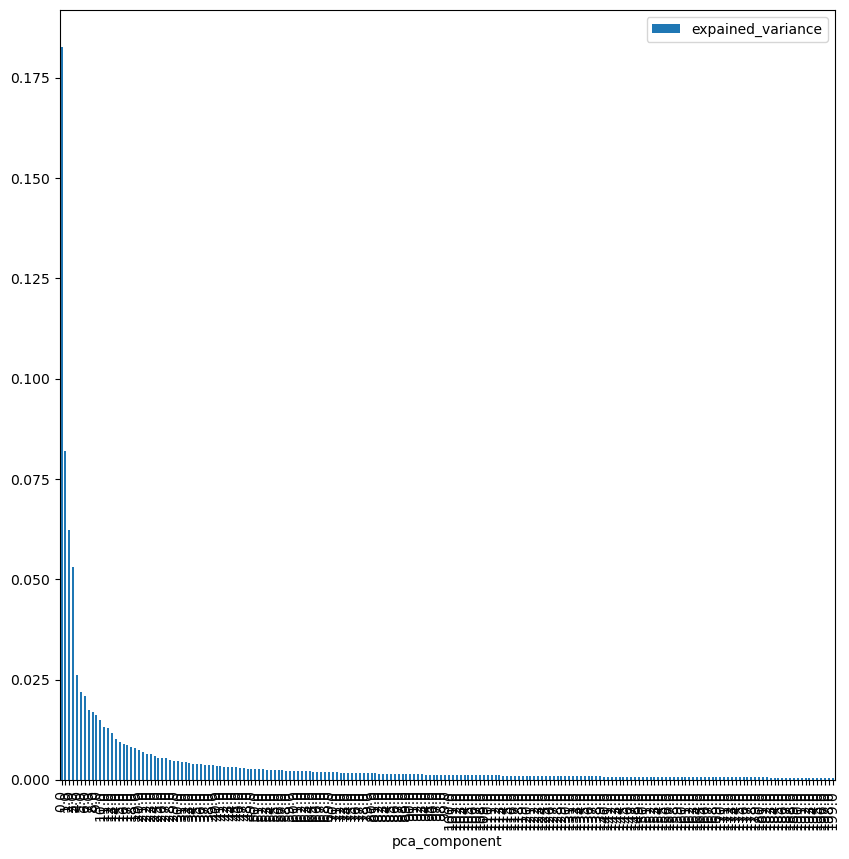

In [115]:
pca_explained_variance.plot.bar(figsize=(10,10))
plt.show()

In [116]:
result = model.transform(output)


In [117]:
result[['_c0','EMBEDDING','pca_features']].show()

+--------+--------------------+--------------------+
|     _c0|           EMBEDDING|        pca_features|
+--------+--------------------+--------------------+
|ug7v899j|[-2.9399836063385...|[45.5191767479419...|
|02tnwd4m|[4.68846559524536...|[39.2175618876395...|
|ejv2xln0|[0.55991977453231...|[43.7417562521787...|
|2b73a28n|[2.35254025459289...|[28.1303147213823...|
|9785vg6d|[-1.2909215688705...|[33.7836469085226...|
|zjufx4fo|[2.72107625007629...|[43.3739933088139...|
|5yhe786e|[-3.5625340938568...|[26.7404131527571...|
|8zchiykl|[-0.0043992102146...|[21.4865831004399...|
|8qnrcgnk|[2.56932306289672...|[44.1111019063031...|
|jg13scgo|[-4.6868729591369...|[31.4485141882645...|
|5tkvsudh|[-0.0718144029378...|[30.3910952381039...|
|6lvn10f4|[-5.2294521331787...|[48.0965130508515...|
|tvxpckxo|[-3.9141044616699...|[34.2473286594095...|
|mcuixluu|[-2.8642659187316...|[41.3484325328029...|
|6iu1dtyl|[2.98795270919799...|[-15.915115119011...|
|t35n7bk9|[-3.9089846611022...|[41.81706420893

In [118]:
result.take(1)[0]['pca_features'].shape


(200,)

In [119]:
result[['pca_features']].show()

+--------------------+
|        pca_features|
+--------------------+
|[45.5191767479419...|
|[39.2175618876395...|
|[43.7417562521787...|
|[28.1303147213823...|
|[33.7836469085226...|
|[43.3739933088139...|
|[26.7404131527571...|
|[21.4865831004399...|
|[44.1111019063031...|
|[31.4485141882645...|
|[30.3910952381039...|
|[48.0965130508515...|
|[34.2473286594095...|
|[41.3484325328029...|
|[-15.915115119011...|
|[41.8170642089369...|
|[48.0204964185355...|
|[32.9055125824685...|
|[43.1631235051976...|
|[43.6947290834690...|
+--------------------+
only showing top 20 rows



In [120]:
result[['_c0','EMBEDDING','pca_features']].sample(.01,1).count()

5614

In [121]:
result.write.parquet("s3://hids511final/corid_embedding_pca_200.parquet")

In [122]:
sample_seed_1 = result[['_c0','EMBEDDING','pca_features']].sample(.1,1)

In [123]:
sample_seed_1.show()

+--------+--------------------+--------------------+
|     _c0|           EMBEDDING|        pca_features|
+--------+--------------------+--------------------+
|ejv2xln0|[0.55991977453231...|[43.7417562521787...|
|8qnrcgnk|[2.56932306289672...|[44.1111019063031...|
|t35n7bk9|[-3.9089846611022...|[41.8170642089369...|
|5dk231qs|[-1.6107922792434...|[37.3428730281375...|
|754nln40|[3.04565191268920...|[43.4475547520552...|
|kvhoa2se|[-2.3809075355529...|[46.3086361234371...|
|cgl34ykt|[-1.1057004928588...|[46.4351013959405...|
|cl9gpt9w|[1.50766968727111...|[39.8882142771185...|
|m71xkuo9|[-0.0716581940650...|[43.6963486463694...|
|oluq7v0h|[-1.7850136756896...|[48.6861400409198...|
|9r62ffew|[-3.0202674865722...|[43.0294982844846...|
|yxhk1qm3|[-2.7779562473297...|[44.9520530272280...|
|pk7pnmlo|[-1.9668906927108...|[34.8744157804821...|
|vefs1h6o|[-2.7721757888793...|[42.4521620552032...|
|1n69h3i3|[-1.4211881160736...|[32.7486645729167...|
|yfn8sy1m|[-4.7059187889099...|[35.56665547373

In [124]:
import pyspark.sql.functions as f

In [37]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

firstelement=f.udf(lambda v:float(v[0]),FloatType())
secondelement=f.udf(lambda v:float(v[1]),FloatType())

sample_seed_1 = sample_seed_1.withColumn("pca_comp_1", firstelement("pca_features"))
sample_seed_1 = sample_seed_1.withColumn("pca_comp_2", secondelement("pca_features"))


sample_seed_1.show()

+--------+--------------------+--------------------+----------+----------+
|     _c0|           EMBEDDING|        pca_features|pca_comp_1|pca_comp_2|
+--------+--------------------+--------------------+----------+----------+
|ejv2xln0|[0.55991977453231...|[43.7417562521787...| 43.741756| 35.843452|
|8qnrcgnk|[2.56932306289672...|[44.1111019063031...| 44.111103| 39.824417|
|t35n7bk9|[-3.9089846611022...|[41.8170642089369...| 41.817062|  27.97944|
|5dk231qs|[-1.6107922792434...|[37.3428730281375...| 37.342873|  9.997731|
|754nln40|[3.04565191268920...|[43.4475547520552...| 43.447556| 25.967598|
|kvhoa2se|[-2.3809075355529...|[46.3086361234371...| 46.308636| 23.619043|
|cgl34ykt|[-1.1057004928588...|[46.4351013959404...|   46.4351| 29.372915|
|cl9gpt9w|[1.50766968727111...|[39.8882142771185...| 39.888214| 14.468685|
|m71xkuo9|[-0.0716581940650...|[43.6963486463694...|  43.69635| 23.445024|
|oluq7v0h|[-1.7850136756896...|[48.6861400409198...|  48.68614| 34.717903|
|9r62ffew|[-3.02026748657

In [40]:
sample_seed_1

DataFrame[_c0: string, EMBEDDING: vector, pca_features: vector, pca_comp_1: float, pca_comp_2: float]

In [74]:
def pca_component1_2_scatter_plot(result,seed,sample_size):
    sample_seed = result[['_c0','EMBEDDING','pca_features']].sample(sample_size,seed)

    sample_seed = sample_seed.withColumn("pca_comp_1", firstelement("pca_features"))
    sample_seed = sample_seed.withColumn("pca_comp_2", secondelement("pca_features"))

    df = pd.DataFrame(sample_seed[['pca_comp_1','pca_comp_2']].collect())

    df.plot.scatter(figsize=(10,10),x=0,y=1,alpha=.1,title="Seed {} ".format(seed))
    plt.show()
    plt.close()

    

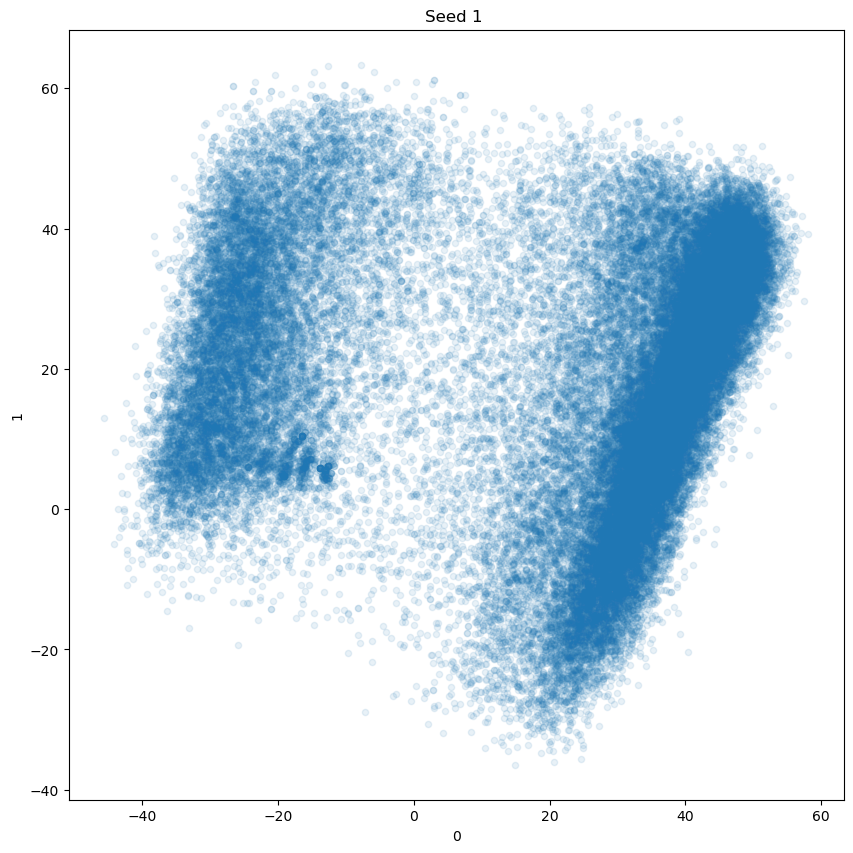

In [125]:
pca_component1_2_scatter_plot(result,1,.1)

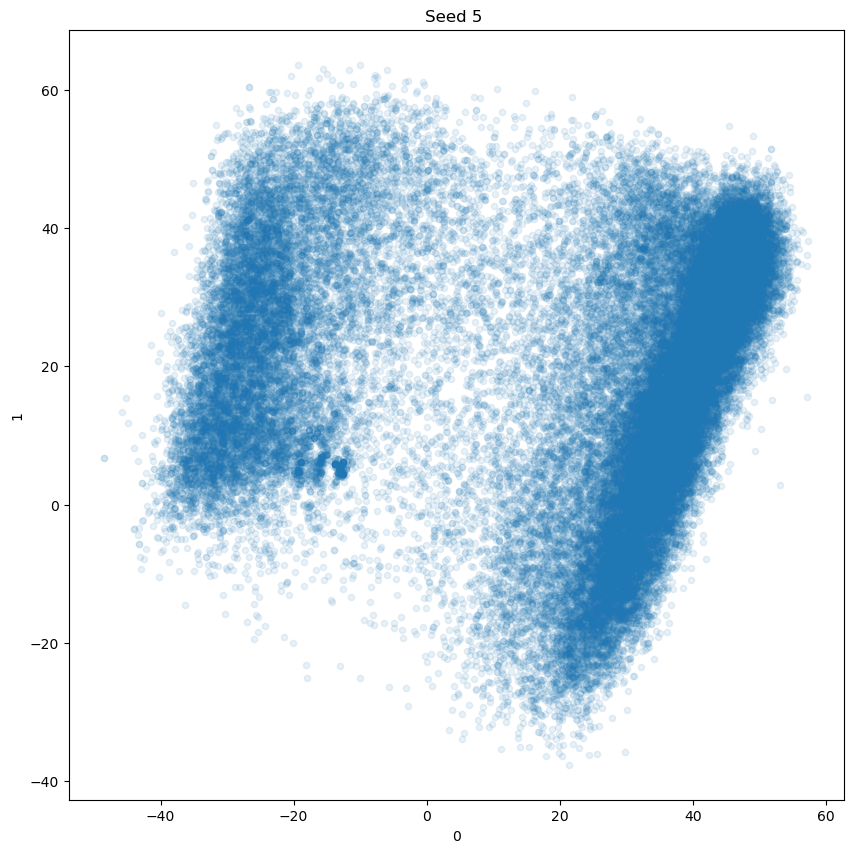

In [75]:
pca_component1_2_scatter_plot(result,5,.1)

In [78]:
result[['pca_features']]

DataFrame[pca_features: vector]

In [80]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [90]:
from tqdm import tqdm

In [ ]:
k_range = range(2, 20)
silhouette_scores = []
for k in tqdm(k_range):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(result.withColumnRenamed("pca_features","features"))
    predictions = model.transform(result.withColumnRenamed("pca_features","features"))

    # Evaluate clustering by computing Silhouette score
    evaluator = ClusteringEvaluator()

    silhouette = evaluator.evaluate(predictions)
    print("Silhouette with squared euclidean distance = " + str(silhouette))
    silhouette_scores.append(silhouette)

silhouette_scores
    

  6%|▌         | 1/18 [05:15<1:29:20, 315.34s/it]

Silhouette with squared euclidean distance = 0.3136501718941936


 11%|█         | 2/18 [10:34<1:24:38, 317.39s/it]

Silhouette with squared euclidean distance = 0.23780317159987732


 17%|█▋        | 3/18 [15:54<1:19:41, 318.78s/it]

Silhouette with squared euclidean distance = 0.18046403994698218


 22%|██▏       | 4/18 [21:05<1:13:38, 315.59s/it]

Silhouette with squared euclidean distance = 0.20586075821644592


 28%|██▊       | 5/18 [25:56<1:06:26, 306.65s/it]

Silhouette with squared euclidean distance = 0.15558701646052772


 33%|███▎      | 6/18 [30:36<59:30, 297.57s/it]  

Silhouette with squared euclidean distance = 0.159277396545386


 39%|███▉      | 7/18 [35:18<53:38, 292.60s/it]

Silhouette with squared euclidean distance = 0.1425486480758364


 44%|████▍     | 8/18 [39:56<48:00, 288.02s/it]

Silhouette with squared euclidean distance = 0.10764972288481113


 50%|█████     | 9/18 [44:38<42:55, 286.16s/it]

Silhouette with squared euclidean distance = 0.12231295290124633


 56%|█████▌    | 10/18 [49:28<38:17, 287.16s/it]

Silhouette with squared euclidean distance = 0.10973635594145158


 61%|██████    | 11/18 [54:17<33:34, 287.72s/it]

Silhouette with squared euclidean distance = 0.1095848723658471


 67%|██████▋   | 12/18 [59:05<28:47, 287.88s/it]

Silhouette with squared euclidean distance = 0.09871898312022262


 72%|███████▏  | 13/18 [1:03:51<23:57, 287.45s/it]

Silhouette with squared euclidean distance = 0.09387088489839195


 78%|███████▊  | 14/18 [1:08:47<19:19, 289.95s/it]

Silhouette with squared euclidean distance = 0.11604082288961559


 83%|████████▎ | 15/18 [1:13:36<14:29, 289.73s/it]

Silhouette with squared euclidean distance = 0.104360673741981


In [127]:
print('sti')

sti


In [128]:
kmeans = KMeans().setK(50).setSeed(1)
model = kmeans.fit(result.withColumnRenamed("pca_features","features"))

# Make predictions
predictions = model.transform(result.withColumnRenamed("pca_features","features"))

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.0811936146473766
Cluster Centers: 
[ 3.10535624e+01  1.19134774e+01 -2.62047577e+01  3.60177600e+01
 -2.53196092e+00  3.41308717e+00  1.41263861e+01  1.97878415e+01
  6.99326046e+00 -9.45429677e+00  8.24361815e+00 -4.79577578e+00
  5.58232575e+00 -4.54081742e+00 -4.88521862e+00 -2.31170334e+00
  8.91515908e+00 -4.60337499e+00  4.86199391e-01 -2.78939704e-01
  2.06901327e+00 -2.23921228e+00 -2.08621176e+00  3.47376481e+00
  2.53655965e+00  1.89930074e+00 -8.06642998e-01 -4.58942533e+00
 -3.49920118e-01 -3.76308781e+00 -1.10545519e+00 -1.20248974e+00
 -1.83529202e+00 -8.68190631e-01  1.22838165e+00 -2.75959724e+00
  1.00644765e+00  3.25151634e+00  3.15842892e-01  2.14565903e+00
  1.75749163e+00  1.29537489e+00  9.82141260e-01  7.80193596e-01
 -9.92650943e-01 -3.55386811e+00 -1.93833744e+00  4.02585153e-01
 -1.61324076e+00  4.40853834e-01 -1.23734041e+00  1.93029215e+00
  2.92315442e+00 -3.13089826e+00 -1.77510450e+00 -2.11933466e+00
  1.6145

In [129]:
len(centers)

50

In [134]:
predictions[['_c0','EMBEDDING','prediction']].show()

+--------+--------------------+----------+
|     _c0|           EMBEDDING|prediction|
+--------+--------------------+----------+
|ug7v899j|[-2.9399836063385...|         7|
|02tnwd4m|[4.68846559524536...|        28|
|ejv2xln0|[0.55991977453231...|        28|
|2b73a28n|[2.35254025459289...|        28|
|9785vg6d|[-1.2909215688705...|         9|
|zjufx4fo|[2.72107625007629...|        14|
|5yhe786e|[-3.5625340938568...|        18|
|8zchiykl|[-0.0043992102146...|         0|
|8qnrcgnk|[2.56932306289672...|        28|
|jg13scgo|[-4.6868729591369...|        49|
|5tkvsudh|[-0.0718144029378...|        14|
|6lvn10f4|[-5.2294521331787...|        14|
|tvxpckxo|[-3.9141044616699...|        14|
|mcuixluu|[-2.8642659187316...|        14|
|6iu1dtyl|[2.98795270919799...|        10|
|t35n7bk9|[-3.9089846611022...|         8|
|eiqypt0m|[-2.7213425636291...|         3|
|sgmk96vr|[-5.2066106796264...|        49|
|di0fcy0j|[1.99472749233245...|        28|
|4k8f7ou1|[-0.0629611015319...|        14|
+--------+-

In [135]:
sc.stop()

In [136]:
spark.stop()